In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('data/customer_booking.csv', encoding='ISO-8859-1')

In [3]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])

# Split features and target variable
X = data.drop('booking_complete', axis=1)
y = data['booking_complete']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,1,0,0,5.52,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,0,0,0,5.52,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,1,1,0,5.52,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,0,0,1,5.52,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,1,0,1,5.52,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,1,0,...,0,0,0,0,0,0,0,0,0,0
49996,1,111,6,4,0,0,0,5.62,1,0,...,0,0,0,0,0,0,0,0,0,0
49997,1,24,6,22,0,0,1,5.62,1,0,...,0,0,0,0,0,0,0,0,0,0
49998,1,15,6,11,1,0,1,5.62,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

In [6]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.53      0.13      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000

Confusion Matrix:
 [[8350  170]
 [1289  191]]


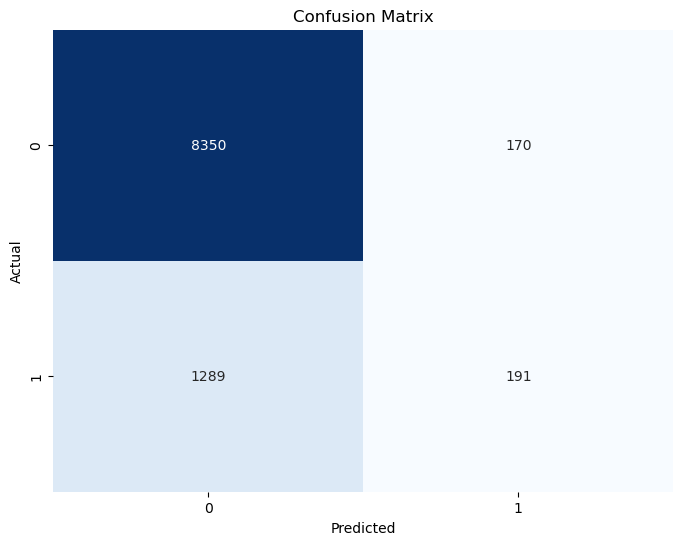

In [10]:
# Create a confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

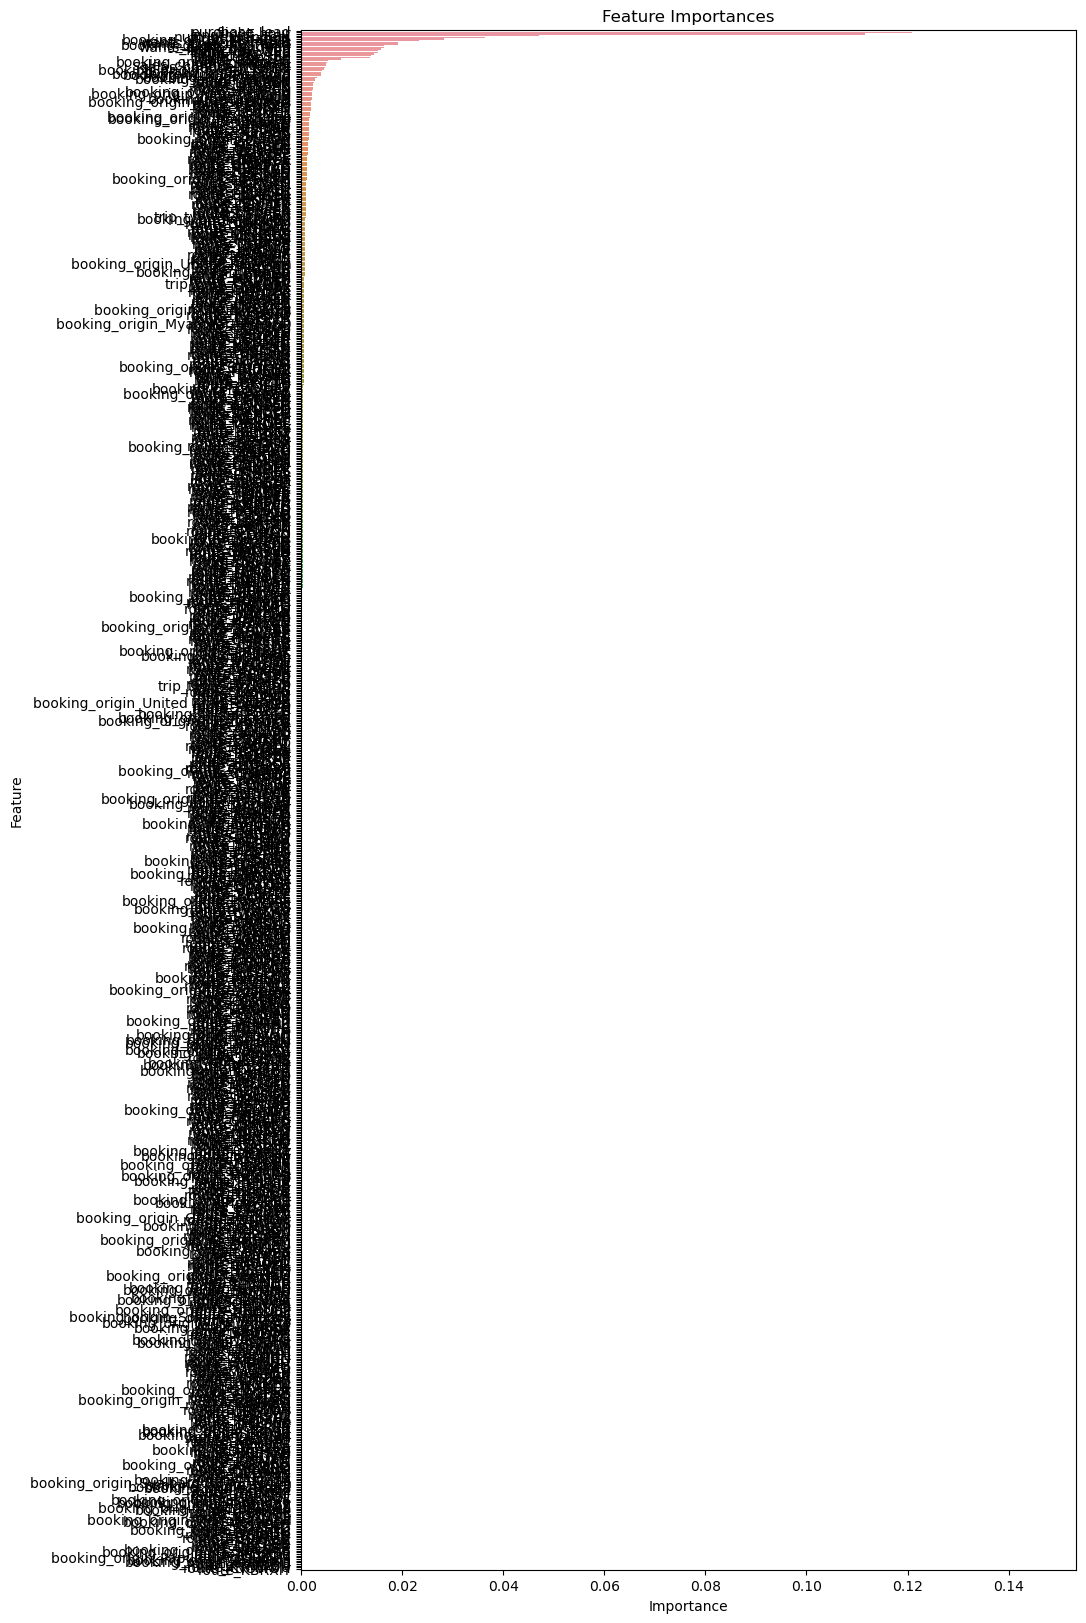

In [8]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to visualize feature importances
feature_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})
feature_df = feature_df.sort_values(by='importance', ascending=False)

# Create a bar plot to visualize feature importances
font = {'size': 30}
plt.figure(figsize=(10,20))
sns.barplot(x='importance', y='feature', data=feature_df)
plt.title('Feature Importances', )
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

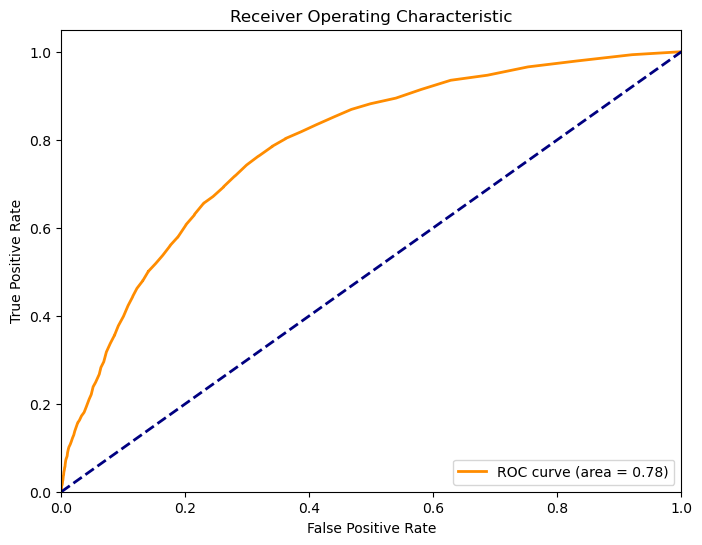

In [9]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
y_probs = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.tree import plot_tree

# Visualize a single decision tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], feature_names=X_train.columns, filled=True, proportion=True, impurity=False, rounded=True)
plt.title('Sample Decision Tree from Random Forest')
plt.show()